In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]

lower_percentile = 0.159
upper_percentile = 0.841

In [13]:

pre = 'features=2/d=8/'


[0.9109375  0.89414063 0.9203125  0.92597656 0.88837891 0.91088867]
[0.85       0.86914062 0.8484375  0.89726562 0.884375   0.83100586]


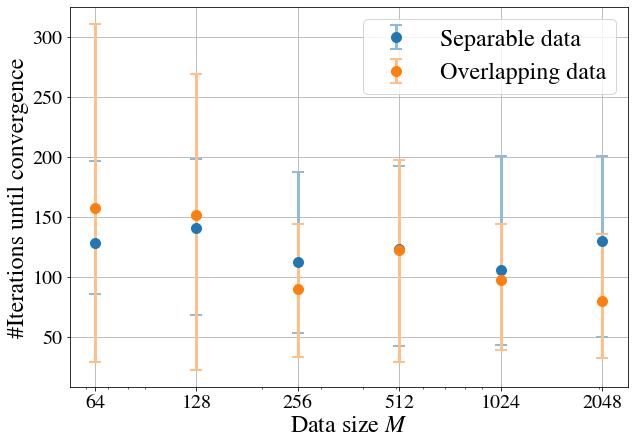

In [14]:
plt.figure(figsize=(10,7))
labels =['Separable data', 'Overlapping data']
for i, sep in enumerate(['separable', 'overlap']):
    df = pd.read_csv(f'{pre}M_{sep}.csv')
    tol = 1e-4
    Ms = np.array(list(set(df['M'])))
    df = df[df['Tol'] == tol]
    samples = 10
    convergences = np.array([df['Convergence'][df['M'] == M][:samples] for M in Ms])
    acc = np.array([df['Accuracy'][df['M'] == M][:samples] for M in Ms])
    #print(convergences)
    print(np.mean(acc,axis=1))
    means = np.mean(convergences, axis = 1)
    lower = np.quantile(convergences, lower_percentile, axis=1)
    upper = np.quantile(convergences, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])

    plt.errorbar(Ms,means,yerr=errors,marker='.',ecolor=colors_light[i],elinewidth=3.,ls='',capsize=6,
            color=colors[i], ms=20,capthick=2., label=labels[i])
            
plt.xscale('log')

plt.xticks(Ms,[int(M) for M in Ms])
plt.grid()
plt.legend()
plt.ylabel('#Iterations until convergence')
plt.xlabel(r'Data size $M$')

plt.savefig(f'plots/approx_M.png',dpi=300,bbox_inches='tight')

[0.90898437 0.92578125 0.92265625 0.82539063 0.83632812 0.89609375]
[0.8859375  0.88828125 0.85273438 0.8515625  0.85       0.765625  ]


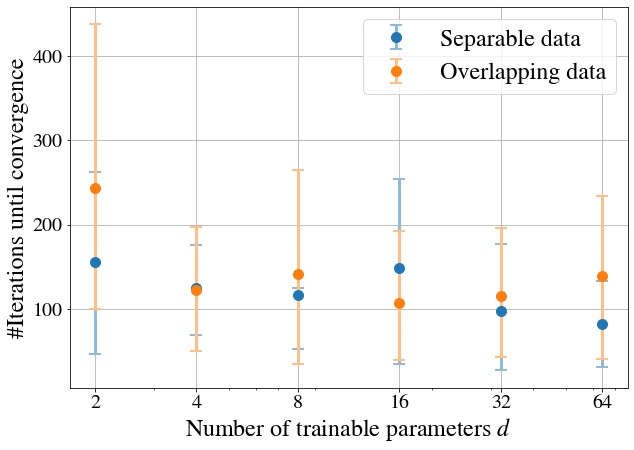

In [11]:
plt.figure(figsize=(10,7))
labels =['Separable data', 'Overlapping data']
for i, sep in enumerate(['separable', 'overlap']):
    df = pd.read_csv(f'features=2/d_{sep}.csv')
    tol = 1e-4
    ds = list(set(df['d']))
    ds.sort()
    ds = np.array(ds)
    df = df[df['Tol'] == tol]
    samples = 10
    convergences = np.array([df['Convergence'][df['d'] == d][:samples] for d in ds])
    acc = np.array([df['Accuracy'][df['d'] == d][:samples] for d in ds])
    #print(convergences)
    print(np.mean(acc,axis=1))
    means = np.mean(convergences, axis = 1)
    lower = np.quantile(convergences, lower_percentile, axis=1)
    upper = np.quantile(convergences, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])

    plt.errorbar(ds,means,yerr=errors,marker='.',ecolor=colors_light[i],elinewidth=3.,ls='',capsize=6,
            color=colors[i], ms=20,capthick=2., label=labels[i])
            
plt.xscale('log')

plt.xticks(ds,[int(d) for d in ds])
plt.grid()
plt.legend()
plt.ylabel('#Iterations until convergence')
plt.xlabel(r'Number of trainable parameters $d$')

plt.savefig(f'plots/approx_d.png',dpi=300,bbox_inches='tight')

[0.6765625  0.80898437 0.82539063 0.88828125 0.90195313 0.921875
 0.88789063 0.92890625 0.92851562 0.91210938]
[0.60898438 0.69960937 0.85078125 0.86054688 0.88164062 0.90976563
 0.91054687 0.89296875 0.89492187 0.9015625 ]


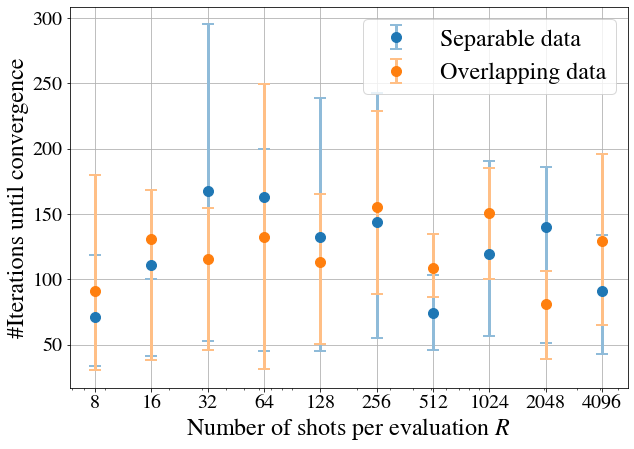

In [15]:
plt.figure(figsize=(10,7))
labels =['Separable data', 'Overlapping data']
for i, sep in enumerate(['separable', 'overlap']):
    df = pd.read_csv(f'features=2/d=8/Conv_{sep}.csv')
    tol = 1e-4
    Rs = list(set(df['R']))
    Rs.sort()
    Rs = np.array(Rs)
    df = df[df['Tol'] == tol]
    samples = 10
    convergences = np.array([df['Convergence'][df['R'] == R][:samples] for R in Rs])
    acc = np.array([df['Accuracy'][df['R'] == R][:samples] for R in Rs])
    #print(convergences)
    print(np.mean(acc, axis = 1))
    means = np.mean(convergences, axis = 1)
    lower = np.quantile(convergences, lower_percentile, axis=1)
    upper = np.quantile(convergences, upper_percentile, axis=1)
    errors = np.array([means - lower, upper - means])

    plt.errorbar(Rs,means,yerr=errors,marker='.',ecolor=colors_light[i],elinewidth=3.,ls='',capsize=6,
            color=colors[i], ms=20,capthick=2., label=labels[i])
            
plt.xscale('log')

plt.xticks(Rs,[int(R) for R in Rs])
plt.grid()
plt.legend()
plt.ylabel('#Iterations until convergence')
plt.xlabel(r'Number of shots per evaluation $R$')

plt.savefig(f'plots/approx_conv.png',dpi=300,bbox_inches='tight')